In [170]:
from __future__ import division
from utils import *
from functions import *
from numba import autojit
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


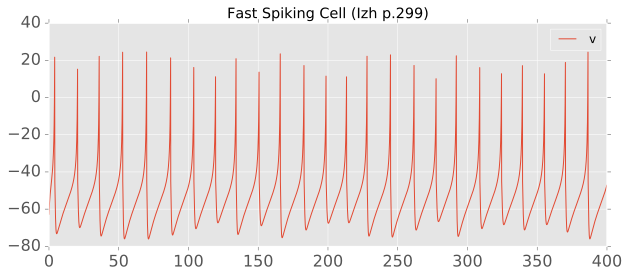

In [46]:
T = 400
dt = 0.1
t = np.arange(0,T,dt)

v = -65
u = 0
I = 200
res_v = []
res_u = []
for i in t:
    v += dt/20 * ( (v+55)*(v+40) - u + I)
    u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
    if v>25: 
        v = -45
    res_v.append(v)
    res_u.append(u)
        
plt.plot(t, res_v, label='v')
plt.title('Fast Spiking Cell (Izh p.299)')
# plt.plot(t, res_u, label = 'u')
plt.legend()

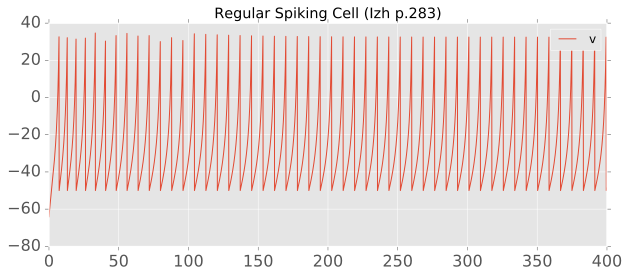

In [80]:
T = 400
dt = 0.1
t = np.arange(0,T,dt)

v = -65
u = 0
I = 800
res_v = []
res_u = []
for i in t:
    v += dt/100 * (0.7* (v+60)*(v+40) - u + I)
    u += dt * 0.03 * ( -2 * (v +60) - u)
    if v>35: 
        v = -50
        u += 100
    res_v.append(v)
    res_u.append(u)
        
plt.plot(t, res_v, label='v')
plt.title('Regular Spiking Cell (Izh p.283)')

# plt.plot(t, res_u, label = 'u')
plt.legend()

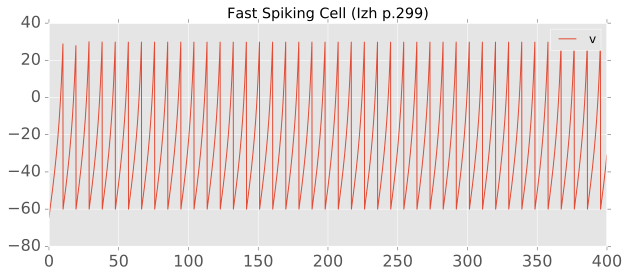

In [45]:
T = 400
dt = 0.1
t = np.arange(0,T,dt)

v = -65
u = 0
I = 200
res_v = []
res_u = []
for i in t:
    v += dt/100 * ( 0.7*(4+60) - u + I)
    u += dt * 0.1 * ( 0.2 * v - u)
    if v>30: 
        v = -60
        u += 2 
    res_v.append(v)
    res_u.append(u)
        
plt.plot(t, res_v, label='v')
plt.title('Fast Spiking Cell (Izh p.299)')
# plt.plot(t, res_u, label = 'u')
plt.legend()

In [ ]:
for i,s in enumerate([100,200,300]):
    ax = fig.add_subplot(231+i) 
    res_v = []
    res_u = []
    I = s
    c= 0
    for i in t:
        v += dt/20 * ( (v+55)*(v+40) - u + I)
        u += dt * 0.03 * ( 0.025 * (v +55)**3*(v>-55) - u)
        if v>25-0.1*u: 
            v = -45
            c+=1
        res_v.append(v)
        res_u.append(u)

    ax.plot(t, res_v, label='v')
    ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Fast Spiking Cell : %g Hz'%float(1000*c/T))
    # plt.plot(t, res_u, label = 'u')

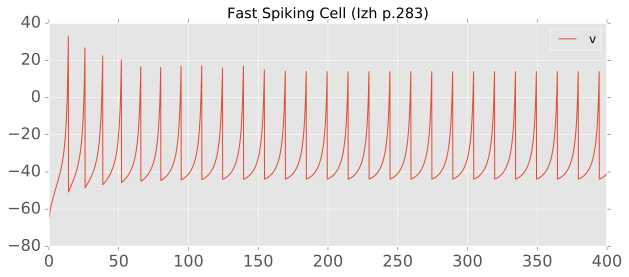

In [66]:
T = 400
dt = 0.1
t = np.arange(0,T,dt)

v = -65
u = 0
I = 300
res_v = []
res_u = []
for i in t:
    v += dt/100 * ((v+56)*(v+42) - u + I)
    u += dt * 0.03 * ( 8 * (v +56) - u)
    if v>40-0.1*u: 
        v = -53 + 0.04*u
        u = min(u+20,670)
    res_v.append(v)
    res_u.append(u)
        
plt.plot(t, res_v, label='v')
plt.title('LTS (Izh p.283)')

# plt.plot(t, res_u, label = 'u')
plt.legend()

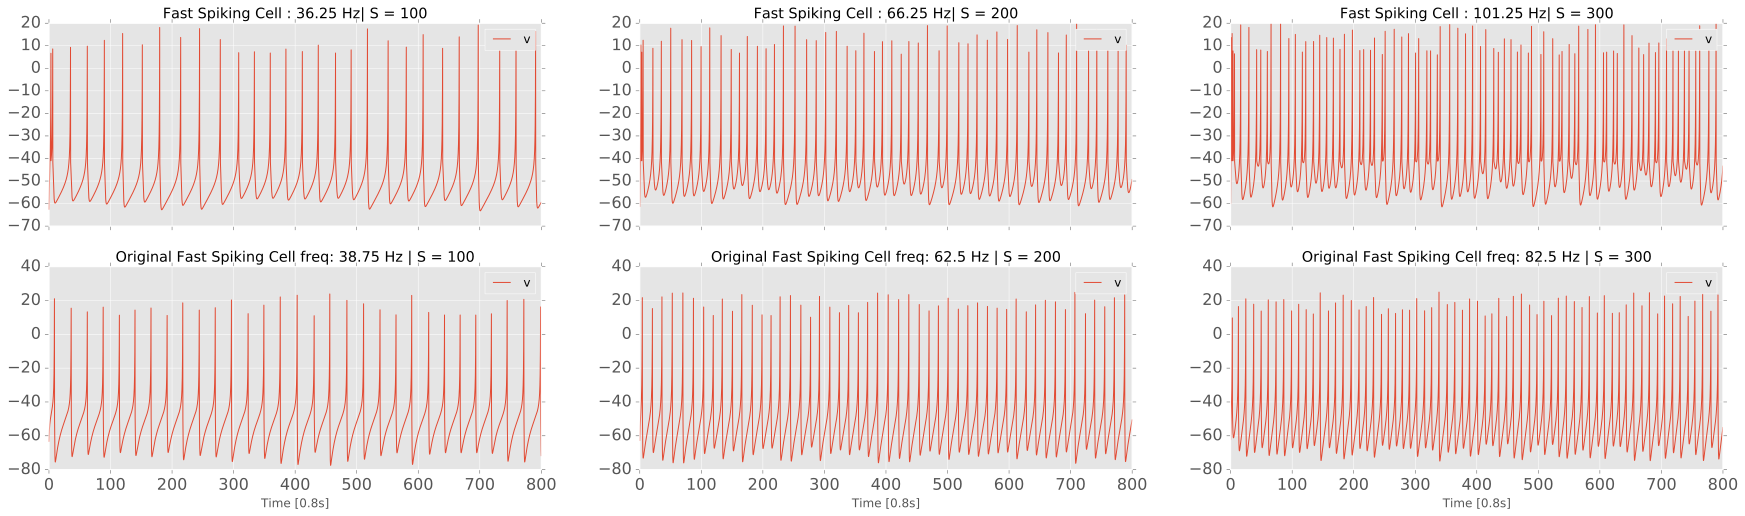

In [171]:
T = 800
dt = 0.1
t = np.arange(0,T,dt)
v = -65

fig = plt.figure(figsize=(30,8))

for i,s in enumerate([100,200,300]):
    ax = fig.add_subplot(231+i) 
    res_v = []
    res_u = []
    I = s
    c= 0
    u=0
    v = -65
    for i in t:
        v += dt/20 * ( (v+55)*(v+40) - u + 2.5*I)
        u += dt * 0.037 * ( 0.05 * (v+55)**3*(v>-55) - u)
        if v>20: 
            v = -41
            c+=1
            u +=-20
        res_v.append(v)
        res_u.append(u)
    ax.set_xticklabels([])
    ax.plot(t, res_v, label='v')
#     ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Fast Spiking Cell : %g Hz| S = %d'%(float(1000*c/T),s))
    # plt.plot(t, res_u, label = 'u')

for i,s in enumerate([100,200,300]):
    ax = fig.add_subplot(234+i) 
    res_v = []
    res_u = []
    c = 0
    I = s
    u=0
    v = -65
    for i in t:
        v += dt/20 * ( (v+55)*(v+40) - u + I)
        u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
        if v>25:
            c += 1
            v = -45
        res_v.append(v)
        res_u.append(u)
    ax.set_xlabel('Time [0.8s]')
    ax.plot(t, res_v, label='v')
#     ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Original Fast Spiking Cell freq: %g Hz | S = %d'%(float(1000*c/T),s))


plt.savefig(DIRECTORY + 'neuron_models.pdf')


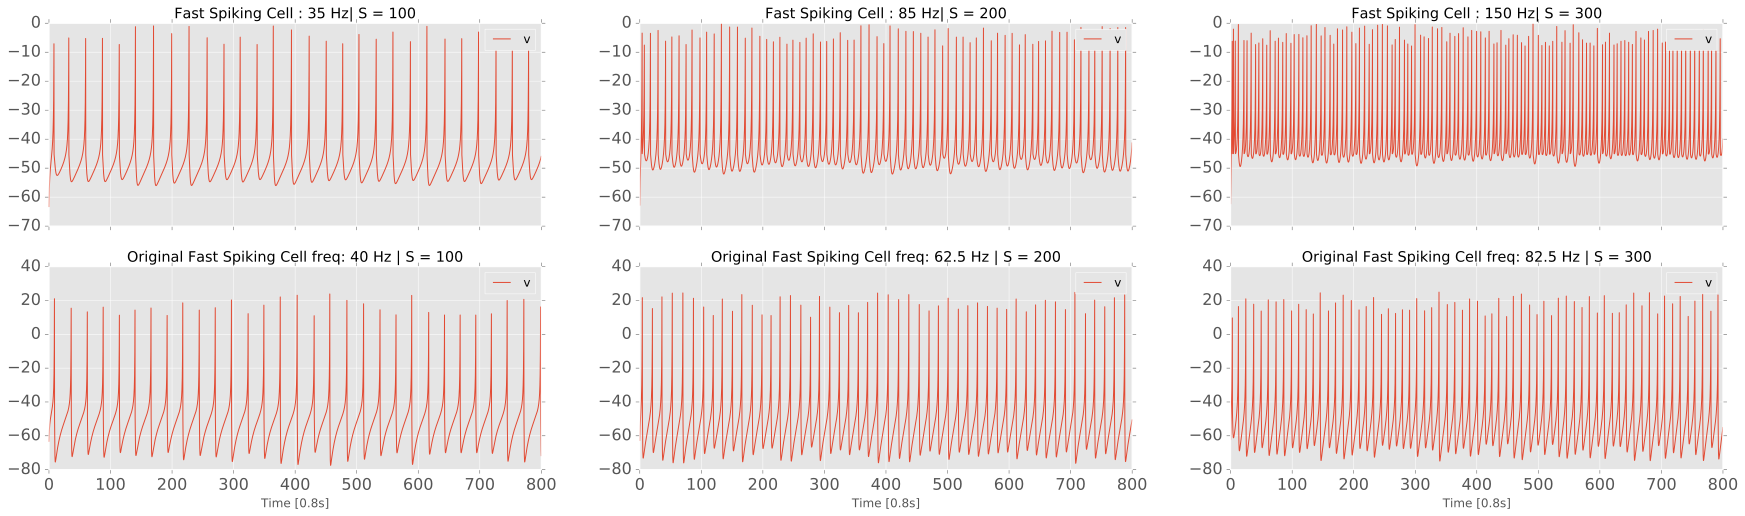

In [218]:
T = 800
dt = 0.1
t = np.arange(0,T,dt)
v = -65

fig = plt.figure(figsize=(30,8))
S = [100,200,300]
for i,s in enumerate(S):
    ax = fig.add_subplot(231+i) 
    res_v = []
    res_u = []
    I = s
    c= 0
    u=0
    v = -65
    for i in t:
        v += dt/20 * ( (v+55)*(v+40) - u + I)
        u += dt * 0.08 * ( 0.02 * (v+55)**3*(v>-55) - u)
        if v>0: 
            v = -45

            if i>T/2:
                c+=1
        res_v.append(v)
        res_u.append(u)
    ax.set_xticklabels([])
    ax.plot(t, res_v, label='v')
#     ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Fast Spiking Cell : %g Hz| S = %d'%(float(1000*c/T*2),s))
    # plt.plot(t, res_u, label = 'u')

for i,s in enumerate(S):
    ax = fig.add_subplot(234+i) 
    res_v = []
    res_u = []
    c = 0
    I = s
    u=0
    v = -65
    for i in t:
        v += dt/20 * ( (v+55)*(v+40) - u + I)
        u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
        if v>25:
            if i > T/2:
                c += 1
            v = -45
        res_v.append(v)
        res_u.append(u)
    ax.set_xlabel('Time [0.8s]')
    ax.plot(t, res_v, label='v')
#     ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Original Fast Spiking Cell freq: %g Hz | S = %d'%(float(1000*c/T*2),s))


plt.savefig(DIRECTORY + 'neuron_models_2.pdf')